In [ ]:
import torch
from torch.utils.data import DataLoader

from modeling.networks.dataset.quora_dataset import QuoraDataset
from modeling.networks.quora_duplicate_gru import QuoraDuplicateGRU
from modeling.networks.train.train_model import train_model
from modeling.networks.utils.loader import save_model_state

%load_ext autoreload
%autoreload 2

In [ ]:
embedding_matrix = torch.load("../registry/embeddings/embedding_matrix.pt")

In [3]:
use_gpu = True
DEVICE = "cuda" if use_gpu else "cpu"
DEVICE

'cuda'

In [4]:
data_train = torch.load("../registry/datasets/quora_train_dataset.pt")
X_q1_train = data_train["X_q1"]
X_q2_train = data_train["X_q2"]
y_train = data_train["y"]

In [5]:
y_train.shape

torch.Size([323432])

In [6]:
data_test = torch.load("../registry/datasets/quora_test_dataset.pt")
X_q1_test = data_test["X_q1"]
X_q2_test = data_test["X_q2"]
y_test = data_test["y"]

In [7]:
y_test.shape

torch.Size([80858])

In [8]:
model = QuoraDuplicateGRU(embedding_matrix, hidden_size=100)
X_q1_batch = X_q1_train[:32]
X_q2_batch = X_q2_train[:32]

output = model(X_q1_batch, X_q2_batch)
print(output.shape)

torch.Size([32])


In [9]:
train_dataset = QuoraDataset(X_q1_train, X_q2_train, y_train)
val_dataset = QuoraDataset(X_q1_test, X_q2_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

Using device: cuda


Training: 100%|██████████ [Elapsed: 03:52 | Remaining: 00:00]  



|Epoch 1/10| Train Loss: 0.4012; Val Loss: 0.3542; Val F1: 0.7585


Training: 100%|██████████ [Elapsed: 03:51 | Remaining: 00:00]



|Epoch 2/10| Train Loss: 0.2943; Val Loss: 0.3387; Val F1: 0.7872


Training: 100%|██████████ [Elapsed: 03:55 | Remaining: 00:00]



|Epoch 3/10| Train Loss: 0.2333; Val Loss: 0.3428; Val F1: 0.7948


Training: 100%|██████████ [Elapsed: 04:01 | Remaining: 00:00]



|Epoch 4/10| Train Loss: 0.1875; Val Loss: 0.3611; Val F1: 0.8074


Training: 100%|██████████ [Elapsed: 04:04 | Remaining: 00:00]



|Epoch 5/10| Train Loss: 0.1540; Val Loss: 0.3863; Val F1: 0.8015
EarlyStopping patience: 1/3


Training: 100%|██████████ [Elapsed: 03:57 | Remaining: 00:00]



|Epoch 6/10| Train Loss: 0.1308; Val Loss: 0.4064; Val F1: 0.8015
EarlyStopping patience: 2/3


Training: 100%|██████████ [Elapsed: 04:10 | Remaining: 00:00]



|Epoch 7/10| Train Loss: 0.1139; Val Loss: 0.4365; Val F1: 0.7975
EarlyStopping patience: 3/3
Early stopping triggered at epoch 7

Best Val F1: 0.8074


          Model Evaluation Metrics           
┏━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Train Value ┃ Validation Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ f1_score │      0.9358 │           0.7975 │
│ roc_auc  │      0.9912 │           0.9250 │
└──────────┴─────────────┴──────────────────┘

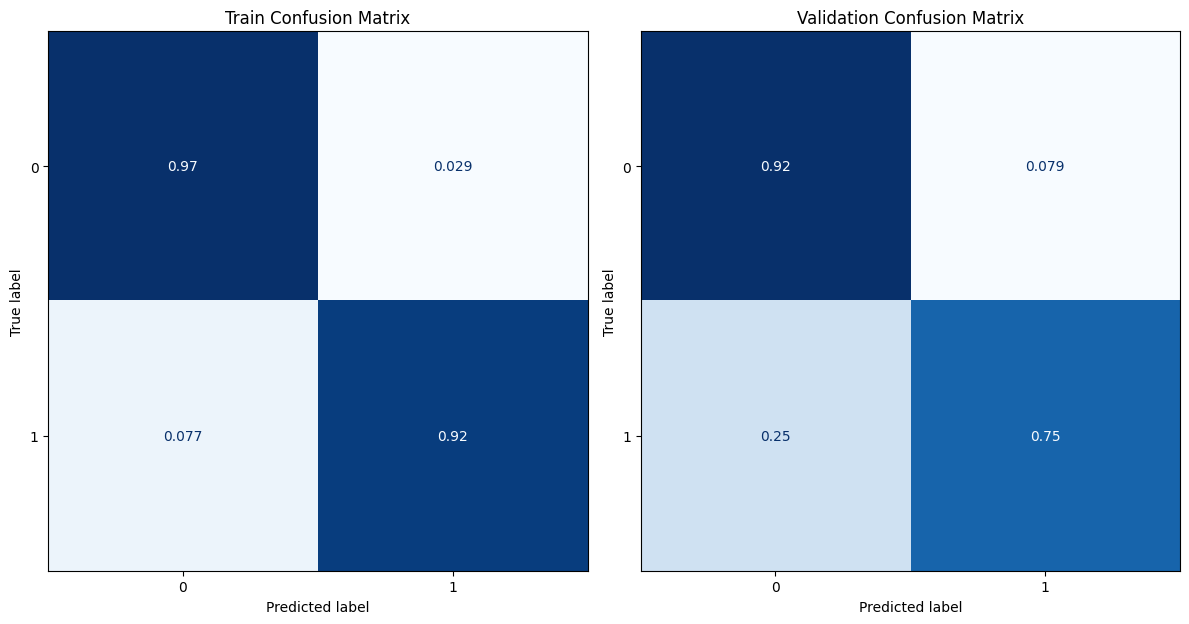

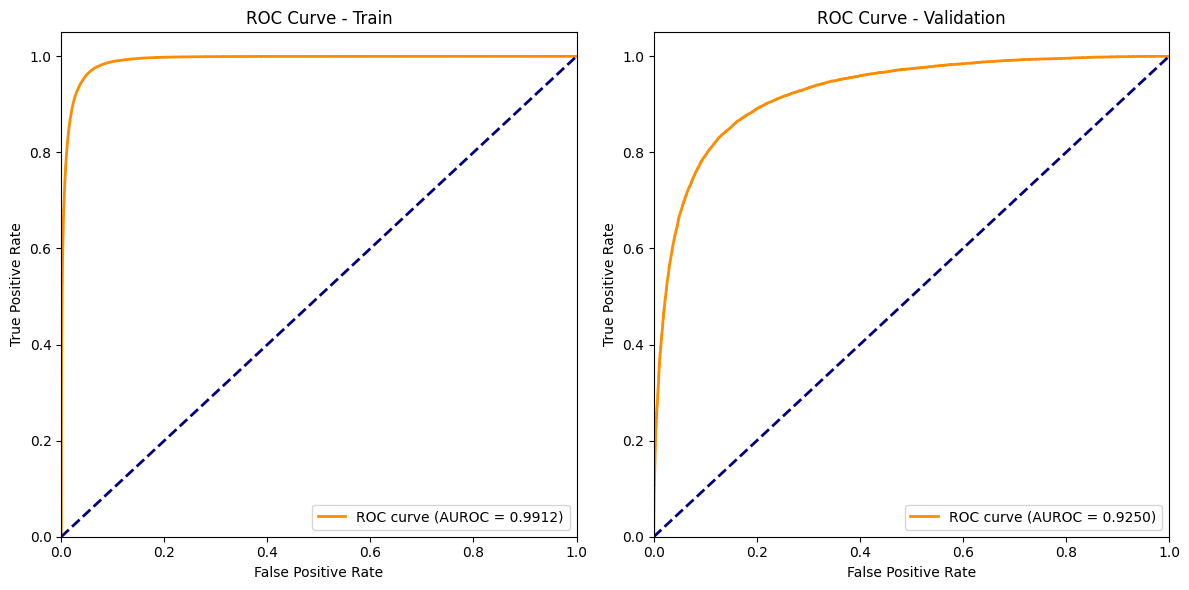

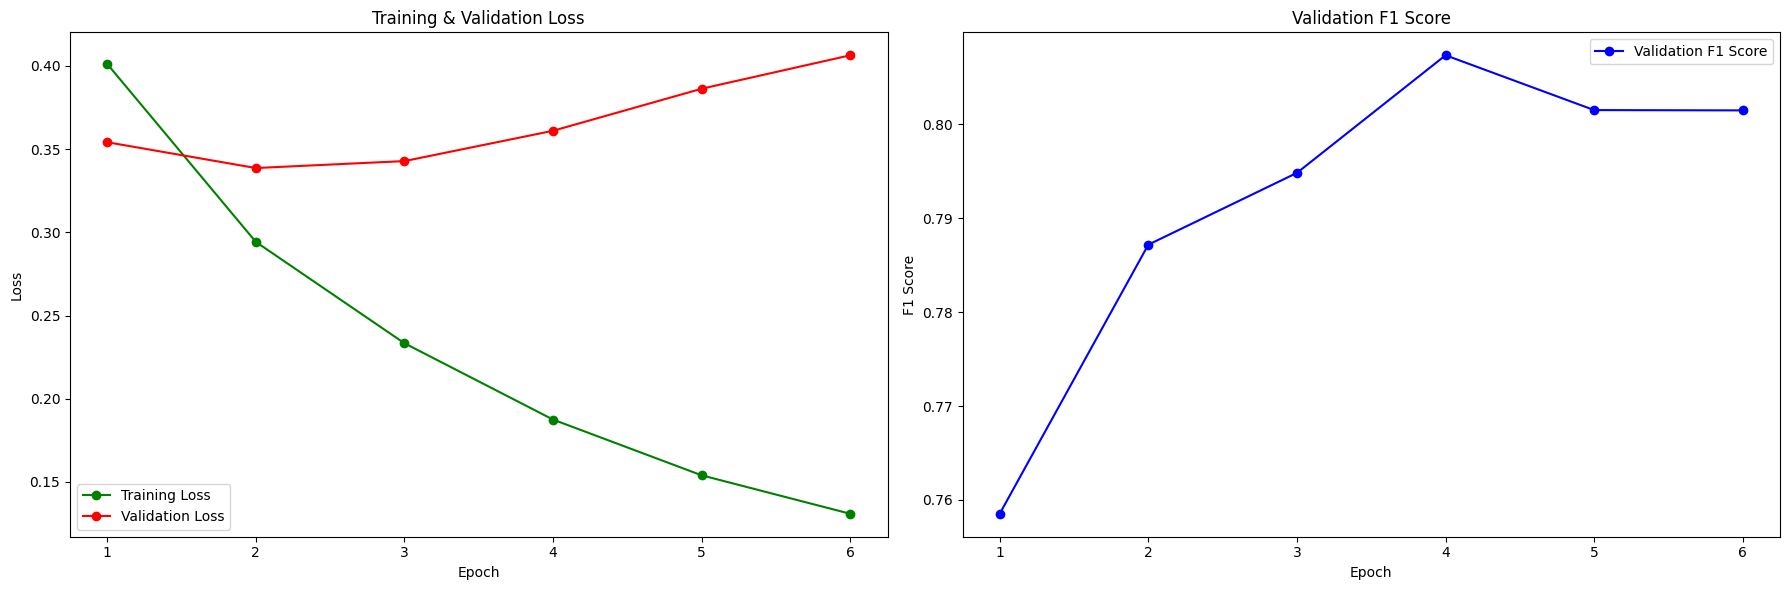

(QuoraDuplicateGRU(
   (embedding): Embedding(50000, 300, padding_idx=0)
   (q_encoder): GRU(300, 100, batch_first=True, bidirectional=True)
   (dropout): Dropout(p=0.3, inplace=False)
   (fc): Linear(in_features=800, out_features=1, bias=True)
 ),
 {'train_loss': [0.40123562402522017,
   0.29428184624661097,
   0.23334801188925502,
   0.18746243377432129,
   0.15395642534463339,
   0.13084009941455402],
  'val_loss': [0.35417833600855175,
   0.33866326520341067,
   0.34283198298739737,
   0.36106274939622385,
   0.38633251812959146,
   0.40644479857490123],
  'val_f1': [0.75851387547603,
   0.787190046128559,
   0.7948422340859509,
   0.8073760622011216,
   0.8015322169703573,
   0.8015012802974499]})

In [10]:
train_model(model, train_loader, val_loader, num_epochs=10, device=DEVICE)

In [11]:
save_model_state(model, path="../registry/models/gru/gru_model.pt")

Model state_dict saved to: C:\Users\altsh\PycharmProjects\duplicate_question_classifier_assigment\registry\models\gru\gru_model.pt
